In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/serial-killercsv/serial_killers.csv


In [20]:
import pandas as pd

In [21]:
data = pd.read_csv('/kaggle/input/serial-killercsv/serial_killers.csv') 

In [22]:
country_counts = data['Country'].value_counts()

In [23]:
highest_country = country_counts.idxmax()
print("The country with the highest number of serial killers is:", highest_country)

The country with the highest number of serial killers is: United States


In [24]:
sorted_country_counts = country_counts.sort_values(ascending=False)
print("Countries with the highest number of serial killers:")
print(sorted_country_counts)

Countries with the highest number of serial killers:
United States                      1064
United Kingdom                       62
Russia                               33
France                               26
South Africa                         21
                                   ... 
France Bolivia  Chile                 1
Victoria South Australia              1
United States Ireland (alleged)       1
Ruanda-Urundi                         1
Mali                                  1
Name: Country, Length: 141, dtype: int64


In [25]:
proven_victims = data['Proven victims'].value_counts()
     

Top_Killers = proven_victims.idxmax()
     

sorted_data = data.sort_values(by='Proven victims', ascending=False)
     

top_5_serial_killers = sorted_data.head(5)

     

print("Top 5 serial killers with the highest number of proven victims:")
print(top_5_serial_killers[['Name', 'Proven victims']])

Top 5 serial killers with the highest number of proven victims:
                                         Name Proven victims
562  Catherine Flannagan and Margaret Higgins    Unconfirmed
544                             Lydia Sherman    Unconfirmed
539                       Juhani Aataminpoika    Unconfirmed
538                            William Palmer    Unconfirmed
537                                   Swiatek    Unconfirmed


In [26]:
import matplotlib.pyplot as plt
     

data['Start Year'] = data['Years active'].str.split('-', expand=True)[0].str.strip()
data['End Year'] = data['Years active'].str.split('-', expand=True)[1].str.strip()

data['Start Year'] = pd.to_numeric(data['Start Year'], errors='coerce')
data['End Year'] = pd.to_numeric(data['End Year'], errors='coerce')

data['Duration'] = data['End Year'] - data['Start Year']

duration_counts = data['Duration'].value_counts()

sorted_duration_counts = duration_counts.sort_index()

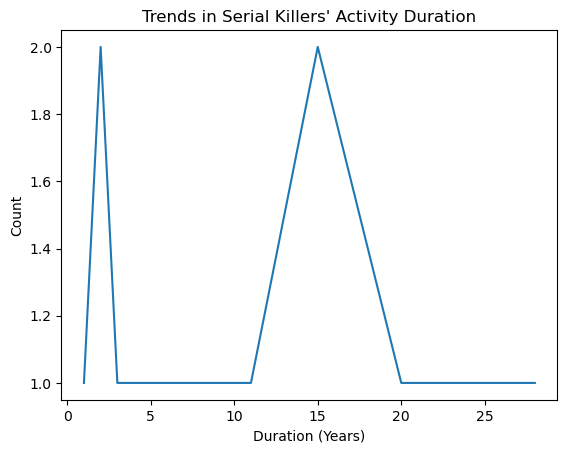

In [27]:
plt.plot(sorted_duration_counts.index, sorted_duration_counts.values)
plt.xlabel('Duration (Years)')
plt.ylabel('Count')
plt.title('Trends in Serial Killers\' Activity Duration')
plt.show()


In [28]:
india_data = data[data['Country'] == 'India']

In [29]:
num_serial_killers_india = india_data.shape[0]

print("Number of serial killers from India:", num_serial_killers_india)

Number of serial killers from India: 12


In [30]:
# Group the data by country and count the number of occurrences
#country_counts = data['Country'].value_counts().reset_index()

# Rename the columns
country_counts.columns = ['Countries', 'Number of Serial Killers']

# Display the table
print(country_counts)

United States                                                                          1064
United Kingdom                                                                           62
Russia                                                                                   33
France                                                                                   26
South Africa                                                                             21
                                                                                       ... 
Belarus                                                                                   1
East Germany  Germany  France  Spain  Czech Republic (suspected)  Italy (suspected)       1
Cyprus                                                                                    1
Canada  United States                                                                     1
Mali                                                                            

In [31]:
modus_operandi = data['Notes'].str.split(',', expand = True).stack().str.strip().value_counts()

In [32]:
print("Most common modus operandi used by serial killers:")
print(modus_operandi.head(10))  # Adjust the number (e.g., 10) to display more or fewer results

Most common modus operandi used by serial killers:
Committed suicide                 25
Florida                           17
California                        16
Sentenced to life imprisonment    14
Kidnapped                         12
raped                             10
Raped                             10
Michigan                           7
Arrested                           7
Killed by police                   7
dtype: int64
